In [1]:
pip install pyaudio

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install pydub

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wave

  Created wheel for wave: filename=Wave-0.0.2-py3-none-any.whl size=1239 sha256=70afb9e7649a3851defff9451176db12b8fdac89cb9c11062d7eb96786c3b0a7
  Stored in directory: c:\users\ch.en.u4aie21058\appdata\local\pip\cache\wheels\ee\3e\b3\bdee8d885ec04fd42bd239e9d9ab9dc94e69aad318c0d9936c
Successfully built wave
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install playsound

  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7037 sha256=ed2b8a7cebd825edf489075fe563298654957b8530ed1c0f419998f533fee125
  Stored in directory: c:\users\ch.en.u4aie21058\appdata\local\pip\cache\wheels\ba\39\54\c8f7ff9a88a644d3c58b4dec802d90b79a2e0fb2a6b884bf82
Successfully built playsound
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pyaudio
import wave

chunk = 1024  # Record in chunks of 1024 samples
sample_format = pyaudio.paInt16  # 16 bits per sample
channels = 2
fs = 44100  # Record at 44100 samples per second
seconds = 3
filename = "output.wav"

p = pyaudio.PyAudio()  # Create an interface to PortAudio

print('Recording')

stream = p.open(format=sample_format,
                channels=channels,
                rate=fs,
                frames_per_buffer=chunk,
                input=True)

frames = []  # Initialize array to store frames

# Store data in chunks for 3 seconds
for i in range(0, int(fs / chunk * seconds)):
    data = stream.read(chunk)
    frames.append(data)

# Stop and close the stream 
stream.stop_stream()
stream.close()
# Terminate the PortAudio interface
p.terminate()

print('Finished recording')

# Save the recorded data as a WAV file
wf = wave.open(filename, 'wb')
wf.setnchannels(channels)
wf.setsampwidth(p.get_sample_size(sample_format))
wf.setframerate(fs)
wf.writeframes(b''.join(frames))
wf.close()

Recording


OSError: [Errno -9996] Invalid input device (no default output device)

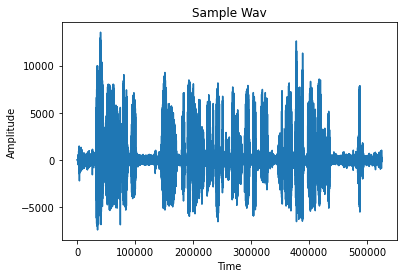

In [16]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt

# read audio samples
input_data = read("aud.wav")
audio = input_data[1]

plt.plot(audio[0:])
s
plt.ylabel("Amplitude")
plt.xlabel("Time")
 
plt.title("Sample Wav")

plt.show()

In [22]:

from pydub import AudioSegment

# import the audio file
wav_file = AudioSegment.from_file(file="aud.wav", format="wav")

# Find the number of bytes per sample
print(" Number of bytes per sample ",wav_file.sample_width )

aud = wav_file.max
# Find Maximum amplitude
print(" Maximum Amplitude ",wav_file.max)

# To know length of audio file
print("Length of the audio file", len(wav_file))

 Number of bytes per sample  2
 Maximum Amplitude  13532
Length of the audio file 10938


In [25]:
ampli_db = 10*np.log10(aud)
print (ampli_db)

41.31361989115943


In [30]:
import pydub
from pydub.playback import play
 
wav_file =  pydub.AudioSegment.from_file(file = "aud.wav",
                                         format = "wav")
# Increase the volume by 10 dB
new_wav_file = wav_file + 30
 
# Reducing volume by 5
silent_wav_file = wav_file - 15
 
#  Playing silent file
play(silent_wav_file)
 
#  Playing original file
play(wav_file)
 
#  Playing louder file
play(new_wav_file)

In [32]:
from pydub import AudioSegment
from pydub.playback import play

audiofile = 'aud.wav'
start_ms = 2000
end_ms = 10938

sound = AudioSegment.from_file(audiofile, format="wav")
splice = sound[start_ms:end_ms]
play(splice)